# Mini Project #1: Baseball Analytics

The overall purpose of this mini-project is to predicting MLB wins per season by modeling data to KMeans clustering model and linear regression models.

## Part 1: Data Import and Handling

In this tutorial, you’ll see how you can easily load in data from a database with `sqlite3`, how you can explore your data and improve its data quality with pandas and matplotlib, and how you can then use the `Scikit-Learn` package to extract some valid insights out of your data.

You will read in the data by querying a `sqlite` database using the sqlite3 package and converting to a DataFrame with pandas. Your data will be filtered to only include currently active modern teams and only years where the team played `150` or more games.

### Import Data

In [453]:
# importing pandas and sqlite3 packages
import pandas as pd
import sqlite3

In [454]:
#connecting the sqlite database to the notebook
conn = sqlite3.connect("../lahman2016.sqlite")

In [455]:
#Writing the SQL query to select the teams which have played more than 150 games and are still active
query = '''select * from Teams
inner join TeamsFranchises on Teams.franchID == TeamsFranchises.franchID
where Teams.G >= 150 and TeamsFranchises.active== 'Y';  '''


#Executing the query 
Teams = conn.execute(query).fetchall()

In [456]:
# Converting the result into a Pandas dataframe 
#### Complete the code block below
#### create a df called `df_Teams' and from the data `Teams`
df_Teams = pd.read_sql_query(query, conn)
#### display the first 10 rows of `df_Teams`
df_Teams.head(10)

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,franchID,franchName,active,NAassoc
0,1961,AL,LAA,ANA,None,8,162,82.0,70,91,...,603510,111,112,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
1,1962,AL,LAA,ANA,None,3,162,81.0,86,76,...,1144063,97,97,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
2,1963,AL,LAA,ANA,None,9,161,81.0,70,91,...,821015,94,94,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
3,1964,AL,LAA,ANA,None,5,162,81.0,82,80,...,760439,90,90,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
4,1965,AL,CAL,ANA,None,7,162,80.0,75,87,...,566727,97,98,CAL,CAL,CAL,ANA,Los Angeles Angels of Anaheim,Y,None
5,1966,AL,CAL,ANA,None,6,162,81.0,80,82,...,1400321,97,97,CAL,CAL,CAL,ANA,Los Angeles Angels of Anaheim,Y,None
6,1967,AL,CAL,ANA,None,5,161,83.0,84,77,...,1317713,95,96,CAL,CAL,CAL,ANA,Los Angeles Angels of Anaheim,Y,None
7,1968,AL,CAL,ANA,None,8,162,81.0,67,95,...,1025956,95,97,CAL,CAL,CAL,ANA,Los Angeles Angels of Anaheim,Y,None
8,1969,AL,CAL,ANA,W,3,163,81.0,71,91,...,758388,94,95,CAL,CAL,CAL,ANA,Los Angeles Angels of Anaheim,Y,None
9,1970,AL,CAL,ANA,W,3,162,81.0,86,76,...,1077741,96,97,CAL,CAL,CAL,ANA,Los Angeles Angels of Anaheim,Y,None


This is the standard process of reading data from a database (`sqlite`) to a `pandas` dataframe. 

Please note that it is a common practice reading data from enterprise systems - so please familiarize yourselves with this part.

### Data Cleaning

Prior to assessing the data quality, let’s first eliminate the columns that aren’t necessary or are derived from the target column (`Wins`). This is where knowledge of the data you are working with starts to become very valuable.

You should have noted that our dataframe (`df_Teams`) has no column names. Let's first define the column names.

In [457]:
# Adding column names to dataframe
cols = ['yearID','lgID','teamID','franchID','divID','Rank','G','Ghome','W','L','DivWin','WCWin','LgWin','WSWin',
        'R','AB','H','2B','3B','HR','BB','SO','SB','CS','HBP','SF','RA','ER','ERA','CG','SHO','SV','IPouts','HA',
        'HRA','BBA','SOA','E','DP','FP','name','park','attendance','BPF','PPF','teamIDBR','teamIDlahman45',
        'teamIDretro','franchID','franchName','active','NAassoc']

#### Complete your code below
#### define columns of `df_Teams` to `cols`
columns = df_Teams[cols]

#### display the first 5 rows of `df_Teams` 
#### you should see 52 columns
df_Teams.head()


,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,franchID,franchName,active,NAassoc
0,1961,AL,LAA,ANA,None,8,162,82.0,70,91,...,603510,111,112,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
1,1962,AL,LAA,ANA,None,3,162,81.0,86,76,...,1144063,97,97,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
2,1963,AL,LAA,ANA,None,9,161,81.0,70,91,...,821015,94,94,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
3,1964,AL,LAA,ANA,None,5,162,81.0,82,80,...,760439,90,90,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
4,1965,AL,CAL,ANA,None,7,162,80.0,75,87,...,566727,97,98,CAL,CAL,CAL,ANA,Los Angeles Angels of Anaheim,Y,None


Some of the columns are not as useful as the others. So that we are going to delete them.

__Note__: what we are doing right now is part of __feature selection__, we have multiple ways of feature selection.

In [458]:
# Dropping your unnecesary column variables.
drop_cols = ['lgID','franchID','divID','Rank','Ghome','L','DivWin','WCWin','LgWin','WSWin','SF','name','park',
             'attendance','BPF','PPF','teamIDBR','teamIDlahman45','teamIDretro','franchID','franchName','active',
             'NAassoc']

#### drop columns contained in `drop_cols` from `df_Teams`
#### and save the remaining columns as `df`
df = df_Teams.drop(drop_cols, axis=1)

#### make sure that these columns are deleted by looking at the first 5 rows of `df`
#### you should see only 29 columns
df.head()

,yearID,teamID,G,W,R,AB,H,2B,3B,HR,...,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP
0,1961,LAA,162,70,744,5424,1331,218,22,189,...,5,34,4314,1391,180,713,973,192,154.0,0.969
1,1962,LAA,162,86,718,5499,1377,232,35,137,...,15,47,4398,1412,118,616,858,175,153.0,0.972
2,1963,LAA,161,70,597,5506,1378,208,38,95,...,13,31,4365,1317,120,578,889,163,155.0,0.974
3,1964,LAA,162,82,544,5362,1297,186,27,102,...,28,41,4350,1273,100,530,965,138,168.0,0.978
4,1965,CAL,162,75,527,5354,1279,200,36,92,...,14,33,4323,1259,91,563,847,123,149.0,0.981


### Handling Missing Values

`2` of the columns have a relatively small amount of null values. There are `110` null values in the `SO` (Strike Outs) column and `22` in the DP (Double Play) column. Two of the columns have a relatively large amount of them. There are `419` null values in the `CS` (Caught Stealing) column and `1777` in the `HBP` (Hit by Pitch) column.

In [460]:
#Identifying the number of null values in the dataframe
# Creating a for loop to display the column names and also their count of missing values 
print('The total number of null values is',df.isnull().values.sum())

for col in df:
    print(col, df[col].isnull().sum())
    

#### complete the code below
#### create an empty list named `names` for columns names

names = []

#### create an empty list named `val` for # of null values in each column

val = []

#### create a for loop iterating each `col` through `df.columns`
names.extend(df.columns)
val.extend(df.isnull().sum())

pairs = zip(names,val)

for col in df.columns:
    print(list(pairs))
    break
    
    


    

    
    #### add column name `col` to `names`

      
    #### add # of null values to `val`
    #### you can get # of null values for column `c` as `df[c].isnull().sum()`

    #### print out results as (column_name, # of null values in column_name)
    #### Note that `col` is the current column_name in iteration
    #### and you should retrieve the # of null values in column_name as the last element in `val`
    #### hint: the last element in a list l is: l[-1]



The total number of null values is 2328
yearID 0
teamID 0
G 0
W 0
R 0
AB 0
H 0
2B 0
3B 0
HR 0
BB 0
SO 110
SB 0
CS 419
HBP 1777
RA 0
ER 0
ERA 0
CG 0
SHO 0
SV 0
IPouts 0
HA 0
HRA 0
BBA 0
SOA 0
E 0
DP 22
FP 0
[('yearID', 0), ('teamID', 0), ('G', 0), ('W', 0), ('R', 0), ('AB', 0), ('H', 0), ('2B', 0), ('3B', 0), ('HR', 0), ('BB', 0), ('SO', 110), ('SB', 0), ('CS', 419), ('HBP', 1777), ('RA', 0), ('ER', 0), ('ERA', 0), ('CG', 0), ('SHO', 0), ('SV', 0), ('IPouts', 0), ('HA', 0), ('HRA', 0), ('BBA', 0), ('SOA', 0), ('E', 0), ('DP', 22), ('FP', 0)]


We are going to drop two columns (`CS` and `HBP`) with too many missing values.

__NOTE__: even though we said that dropping columns with missing values is the __last resort__, the reason we are dropping the columns here is that because of the number of missing values, it will be very difficult for us to impute them in these two columns.

In [461]:
#Dropping the columns with large number of null values


#### drop `CS` & `HBP` from `df`
#### and save the remaining as `df`


df = df.drop(columns=['CS','HBP'])

#### check the first 5 rows of the new `df` to see 
#### if the two columns are successfully dropped
#### you should expect to see 27 columns now
df.head()

,yearID,teamID,G,W,R,AB,H,2B,3B,HR,...,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP
0,1961,LAA,162,70,744,5424,1331,218,22,189,...,5,34,4314,1391,180,713,973,192,154.0,0.969
1,1962,LAA,162,86,718,5499,1377,232,35,137,...,15,47,4398,1412,118,616,858,175,153.0,0.972
2,1963,LAA,161,70,597,5506,1378,208,38,95,...,13,31,4365,1317,120,578,889,163,155.0,0.974
3,1964,LAA,162,82,544,5362,1297,186,27,102,...,28,41,4350,1273,100,530,965,138,168.0,0.978
4,1965,CAL,162,75,527,5354,1279,200,36,92,...,14,33,4323,1259,91,563,847,123,149.0,0.981


With the two columns dropped, we can impute the missing values in the other two columns (`SO` and `DP`) since they have much less.

### Impute Missing Values

As a design decision, we decide to use `median` instead of `mean` to impute the missing values. Use the block below to answer __why we made that decision__.

It is best to use median if there are significant outliers in the coulmn of the data set which we are imputing missing values.

In [462]:
# Filling the missing values with the median of their respective column values
#### complete your code below
#### you can impute the missing values in a column using the `fillna()` function provided by `pandas`
#### fillna() works as `df[col].fillna(some_value)`, in this case the value is `df[col].median()`
#### NOTE that `col` above is the name of the column you want to impute
median_SO = df['SO'].median()

median_DP = df['DP'].median()


df['SO'].fillna(median_SO, inplace=True)
df['DP'].fillna(median_DP, inplace=True)


#### Double-check if the null values are filled
#### you should see `0`s for all columns 
print(df.isnull().sum())

yearID    0
teamID    0
G         0
W         0
R         0
AB        0
H         0
2B        0
3B        0
HR        0
BB        0
SO        0
SB        0
RA        0
ER        0
ERA       0
CG        0
SHO       0
SV        0
IPouts    0
HA        0
HRA       0
BBA       0
SOA       0
E         0
DP        0
FP        0
dtype: int64


There is an easier way of checking null values in a dataframe. You can use either way based on your preference.

In [463]:
# Again checking for null values 
# if see any value which is not `0` that means you still have null values in your data
# in this case we are fine
print(df.isnull().sum(axis=0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### Exploring and Visualizing The Data

Exploring your data using different types of visualizations is always a good practice when doing EDA.

You’ll start by plotting a histogram of the target column (`W`) so you can see the distribution of wins.

In [464]:
#importing matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

#### the statement below ask matplotlib to use the 'ggplot' style
#### you should consider using that
plt.style.use('ggplot')

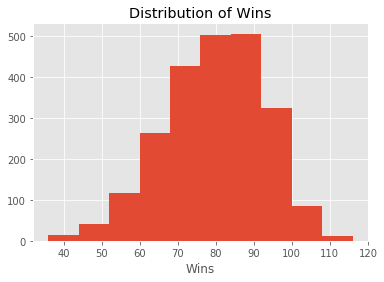

In [465]:
#### Complete your code below
#### create a histogram `hist()` over the column `df['W']`

df['W'].hist()
#### adding elements to your visualization to increase the readability
#### you should always have title and axis name(s) in your visualization
#### name your x-axis label as `Wins`

plt.title('Distribution of Wins')
plt.xlabel('Wins')
#### name your visualization title as `Distribution of Wins`


#### show your visualization
plt.show()

In [466]:
#### We can also check the descriptive stats of `df['W']` using `.describe()`
df['W'].describe()

count    2287.000000
mean       79.230433
std        13.045240
min        36.000000
25%        70.000000
50%        80.000000
75%        89.000000
max       116.000000
Name: W, dtype: float64

You should already know that `df['W']` is a __continuous__ field. 

__Answer this question__: When the target variable is continuous, what type of analysis are we doing (select from classification/clustering/regression), and why? __Use the block below to answer__.

When the target variable is continuous we are doing regression because it involves estimating or predicting a response where as classification would identify group membership.

One way to convert a continuous variable to categorical is through binning. You can bin your continuous variable using its distribution, any external knowledge, or some other logical reasons. But __be sure to include your reason in your analytical report__.

In [467]:
#Creating Bins for ploting and understanding of the target 

## Binning for Cintinuous and categorical 

def assign_win_bins(W):
    if W < 50:                    # Creating a bin value of 1 for wins amounting less than 50
        return(1)
    if W >= 50 and W <= 69:       # Creating a bin value of 2 for wins amounting less than 70 and greater than 50 
        return(2)
    if W >= 70 and W <= 89:       # Creating a bin value of 3 for wins amounting less than 90 and greater than 70
        return(3)
    if W >= 90 and W <= 109:      # Creating a bin value of 4 for wins amounting less than 110 and greater than 90
        return(4)
    if W >= 110:                  # Creating a bin value of 5 for wins amounting greater than 110
        return(5)
   
df['Win_bins'] = df['W'].apply(assign_win_bins)  # Creating a new column Win_bins in the dataframe

df.head()

,yearID,teamID,G,W,R,AB,H,2B,3B,HR,...,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,Win_bins
0,1961,LAA,162,70,744,5424,1331,218,22,189,...,34,4314,1391,180,713,973,192,154.0,0.969,3
1,1962,LAA,162,86,718,5499,1377,232,35,137,...,47,4398,1412,118,616,858,175,153.0,0.972,3
2,1963,LAA,161,70,597,5506,1378,208,38,95,...,31,4365,1317,120,578,889,163,155.0,0.974,3
3,1964,LAA,162,82,544,5362,1297,186,27,102,...,41,4350,1273,100,530,965,138,168.0,0.978,3
4,1965,CAL,162,75,527,5354,1279,200,36,92,...,33,4323,1259,91,563,847,123,149.0,0.981,3


You probably already know that we need to look at the newly binned column (`Win_bins`). Instead of bar chart (distribution chart), we want to look at its values crossed by `Years`.

Scatterplot is very suitable for that purpose.

You will use the `scatter()` method to create the scatterplot. In the `scatter()` method: 
- __STEP1__: you need to first define two axis: `df['yearID']` and `df['W']`. __Note__ that we need the continuous value for the axis so that we use `df['W']` instead of `df['Win_bins]`;
- __STEP2__: you need to define how to color your points by invoking the `c=` parameter. Here we want to color the data points by `df['Win_bins']`;
- __STEP3__: As said above, we want to add title (`Win by Year Scatterplot`), x-axis label (`Years`), and y-axis label (`Wins`) to the scatterplot. __Hint__: as we did before, you can use `plt.title()` method to add title to your plot;
- __STEP4__: Then you need to display your plot by calling the `show()` method.

Use above logic to complete the code block below.


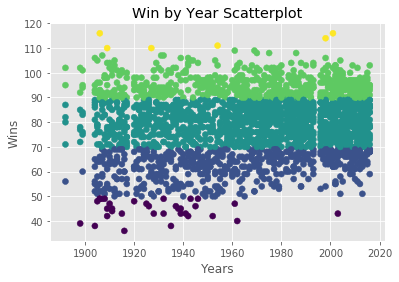

In [468]:
#Scatter plot for the yearwise wins

#### STEP 1 & 2

plt.scatter(df['yearID'],df['W'], c=df['Win_bins'])

#### STEP 3
plt.title('Win by Year Scatterplot')
plt.xlabel('Years')
plt.ylabel('Wins')
#### STEP 4
plt.show()

Looks like our binning is good - bins `[2, 3, 4]` capture the majority of data, while bins `[1, 5]` capture the extreme values (outliers).

Let's save the processed data to a CSV file so that we can re-use it in part 2.

In [469]:
df.to_csv('../baseball_analytics_pt1.csv')

That's all for part one. Please make sure your sync the complete notebook to your github repo for submission.